## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [7]:
(df.head())

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge**: Count the number of entries in each column of the dataframe

In [24]:
for x in range(len(df.columns)):
    print(f"Column {df.columns[x]} has {df['TAG'].count()} entries.")

Column DATE has 1991 entries.
Column TAG has 1991 entries.
Column POSTS has 1991 entries.


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [52]:
df.groupby("TAG").sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,65286


In [37]:
df["TAG"].groupby(df["TAG"]).count().idxmax()

'c#'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [59]:
df.groupby(df["TAG"]).count().sort_values(by="POSTS",ascending=True)

,DATE,POSTS
TAG,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


In [43]:
df["DATE"].groupby(df["TAG"]).count().idxmin()

'go'

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [60]:
df["DATE"][1]

'2008-08-01 00:00:00'

In [61]:
type(df["DATE"][1])

str

In [63]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

## Data Manipulation



In [64]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [65]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [66]:
df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


In [108]:
reshaped_df = df.pivot(index="DATE",  columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01 00:00:00,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01 00:00:00,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


What are the dimensions of our new dataframe? How many rows and columns does it have? 

In [109]:
reshaped_df.shape

(145, 14)

Print out the column names and print out the first 5 rows of the dataframe.

In [111]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [112]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [113]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01 00:00:00,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01 00:00:00,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01 00:00:00,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01 00:00:00,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [114]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [118]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [117]:
for x in ((reshaped_df.columns)):
    print(f"{x} : {reshaped_df[x].count()}")

assembly : 144
c : 144
c# : 145
c++ : 144
delphi : 144
go : 129
java : 144
javascript : 144
perl : 144
php : 144
python : 144
r : 142
ruby : 144
swift : 135


## Dealing with NaN Values

In [120]:
reshaped_df.fillna(0, inplace=True)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01 00:00:00,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01 00:00:00,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01 00:00:00,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01 00:00:00,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01 00:00:00,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01 00:00:00,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01 00:00:00,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


We can also check if there are any NaN values left in the entire DataFrame with this line:


In [121]:

reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [175]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [150]:
print(reshaped_df["java"].values)
type(reshaped_df["java"].values)
y = reshaped_df["java"].values

[    0.   222.  1137.  1153.   958.   832.  1150.  1208.  1440.  1534.
  1819.  2115.  2263.  2193.  2264.  2505.  2763.  2690.  3728.  3582.
  4448.  3889.  4177.  4290.  4522.  4712.  4723.  5033.  5603.  5682.
  6546.  6876.  8482.  7903.  8576.  7926.  8172.  8703.  8348.  8577.
  9665.  9227. 10164. 10981. 12425. 12070. 12214. 11142. 12274. 12275.
 11635. 13517. 13632. 12451. 13753. 13757. 15971. 16310. 15359. 14003.
 15263. 15122. 16330. 18816. 18846. 17536. 18767. 19378. 22109. 21020.
 18088. 16016. 17466. 15837. 16820. 18010. 17956. 16470. 16639. 16827.
 19850. 19890. 18605. 17919. 18761. 17139. 17003. 18603. 17836. 16610.
 16691. 17900. 19972. 19551. 17104. 15962. 14991. 15226. 14726. 15388.
 15695. 13887. 14621. 14613. 17366. 15987. 16395. 14658. 14191. 13784.
 12800. 14051. 14242. 12023. 12391. 12084. 13617. 13549. 13518. 11846.
 11823. 11420. 10884. 12668. 11886. 10614. 11196. 11164. 12254. 11352.
 11297.  9787. 11024.  9646. 11332. 13156. 12165. 10602. 11522. 11602.
 13253

In [160]:
print(reshaped_df["python"].values)
type(reshaped_df["python"].values)
y2 = reshaped_df["python"].values

[    0.   124.   542.   510.   452.   441.   631.   630.   765.   768.
   999.  1045.  1162.  1139.  1166.  1421.  1559.  1589.  1949.  1866.
  2072.  1816.  2010.  2209.  2596.  2494.  2252.  2672.  2611.  2484.
  2907.  3017.  3751.  3348.  3522.  3475.  3667.  3835.  3522.  3631.
  3877.  3627.  4212.  4498.  5049.  4932.  5111.  5286.  5738.  5872.
  5260.  6138.  6403.  5765.  6590.  6755.  7650.  7965.  7839.  7618.
  8642.  7960.  7989.  9522.  9522.  8492.  9864.  9939. 11468. 10812.
  9301.  8954.  9974.  9149.  8807.  9626.  9612.  9078.  9730. 10230.
 11653. 11488. 11251. 11841. 12364. 11258. 10999. 12529. 12339. 11686.
 12385. 13292. 14118. 13706. 13162. 12953. 12863. 12944. 12380. 13543.
 14228. 13082. 14316. 14813. 17167. 15686. 16214. 16074. 16961. 16512.
 15485. 17002. 17038. 15004. 16302. 16389. 17965. 17028. 17628. 16857.
 17981. 17870. 16154. 18328. 18209. 15918. 17163. 17746. 20136. 20045.
 19122. 17507. 20030. 18805. 19201. 23398. 23590. 20526. 22699. 22938.
 26673

In [ ]:
print(reshaped_df.index.values)
type(reshaped_df.index.values)

x = reshaped_df.index.values

['2008-07-01 00:00:00' '2008-08-01 00:00:00' '2008-09-01 00:00:00'
 '2008-10-01 00:00:00' '2008-11-01 00:00:00' '2008-12-01 00:00:00'
 '2009-01-01 00:00:00' '2009-02-01 00:00:00' '2009-03-01 00:00:00'
 '2009-04-01 00:00:00' '2009-05-01 00:00:00' '2009-06-01 00:00:00'
 '2009-07-01 00:00:00' '2009-08-01 00:00:00' '2009-09-01 00:00:00'
 '2009-10-01 00:00:00' '2009-11-01 00:00:00' '2009-12-01 00:00:00'
 '2010-01-01 00:00:00' '2010-02-01 00:00:00' '2010-03-01 00:00:00'
 '2010-04-01 00:00:00' '2010-05-01 00:00:00' '2010-06-01 00:00:00'
 '2010-07-01 00:00:00' '2010-08-01 00:00:00' '2010-09-01 00:00:00'
 '2010-10-01 00:00:00' '2010-11-01 00:00:00' '2010-12-01 00:00:00'
 '2011-01-01 00:00:00' '2011-02-01 00:00:00' '2011-03-01 00:00:00'
 '2011-04-01 00:00:00' '2011-05-01 00:00:00' '2011-06-01 00:00:00'
 '2011-07-01 00:00:00' '2011-08-01 00:00:00' '2011-09-01 00:00:00'
 '2011-10-01 00:00:00' '2011-11-01 00:00:00' '2011-12-01 00:00:00'
 '2012-01-01 00:00:00' '2012-02-01 00:00:00' '2012-03-01 00:00

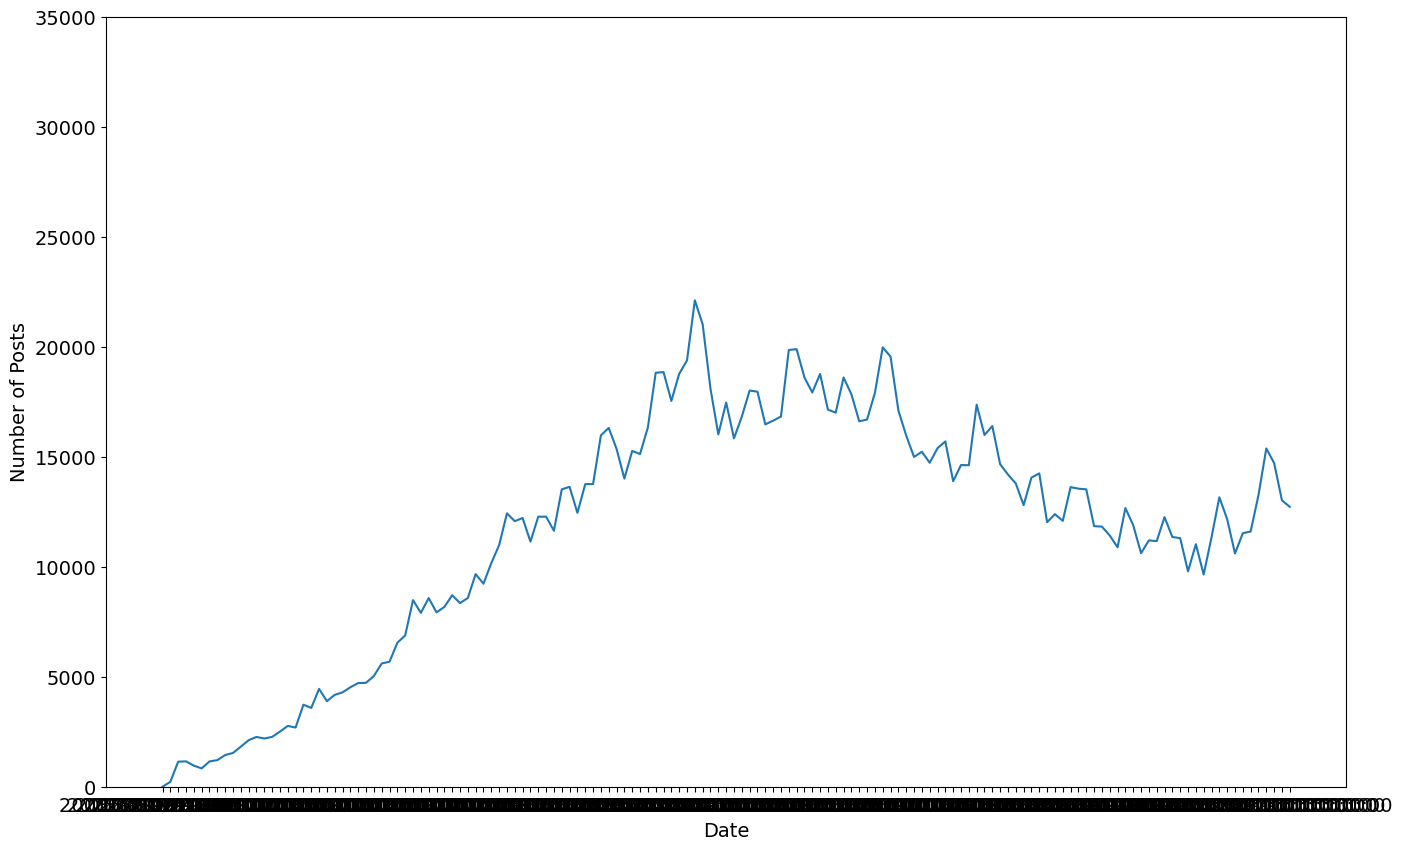

In [162]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y, label = "Java")



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

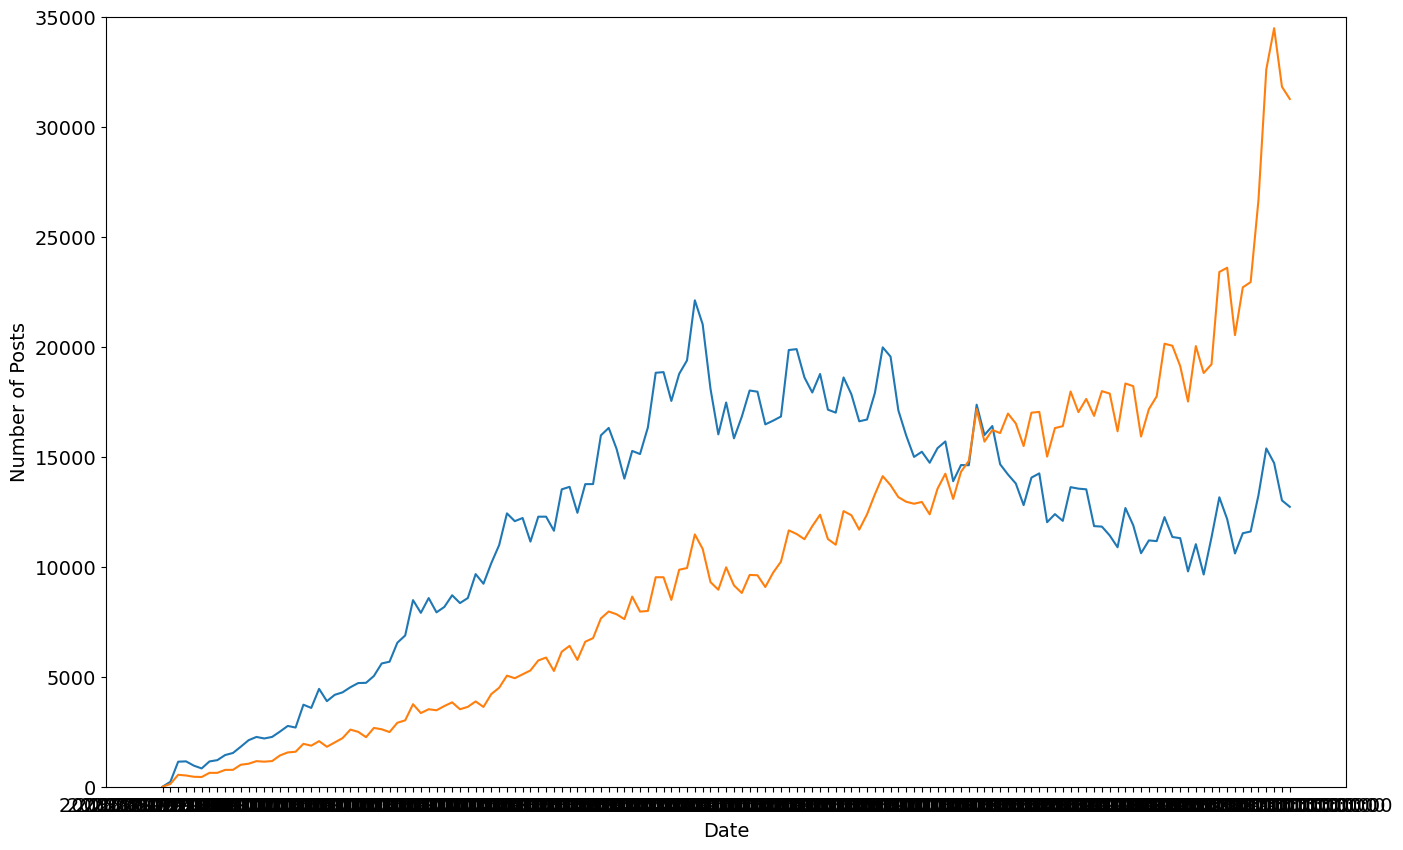

In [164]:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize = 14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(x, y, label = "Java")
plt.plot(x, y2, label = "Python")


multiple lines chart

In [ ]:



plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df["java"], label="Java")
plt.plot(reshaped_df.index, reshaped_df["python"], label="Python")

# Set major ticks every 2 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # gap every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show only the year

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

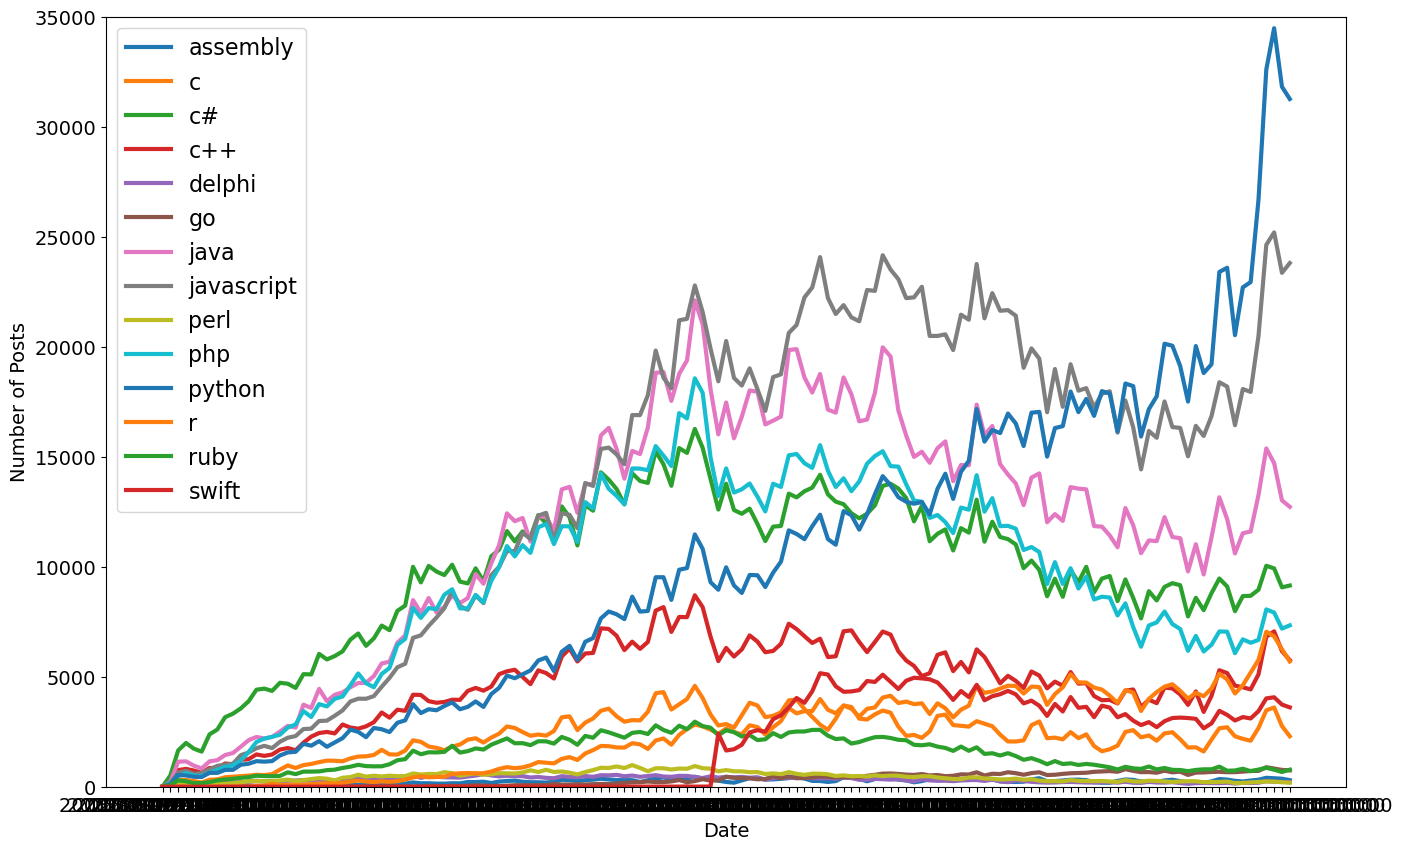

In [ ]:
# Make sure your index is datetime
reshaped_df.index = pd.to_datetime(reshaped_df.index)

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(x, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)   
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

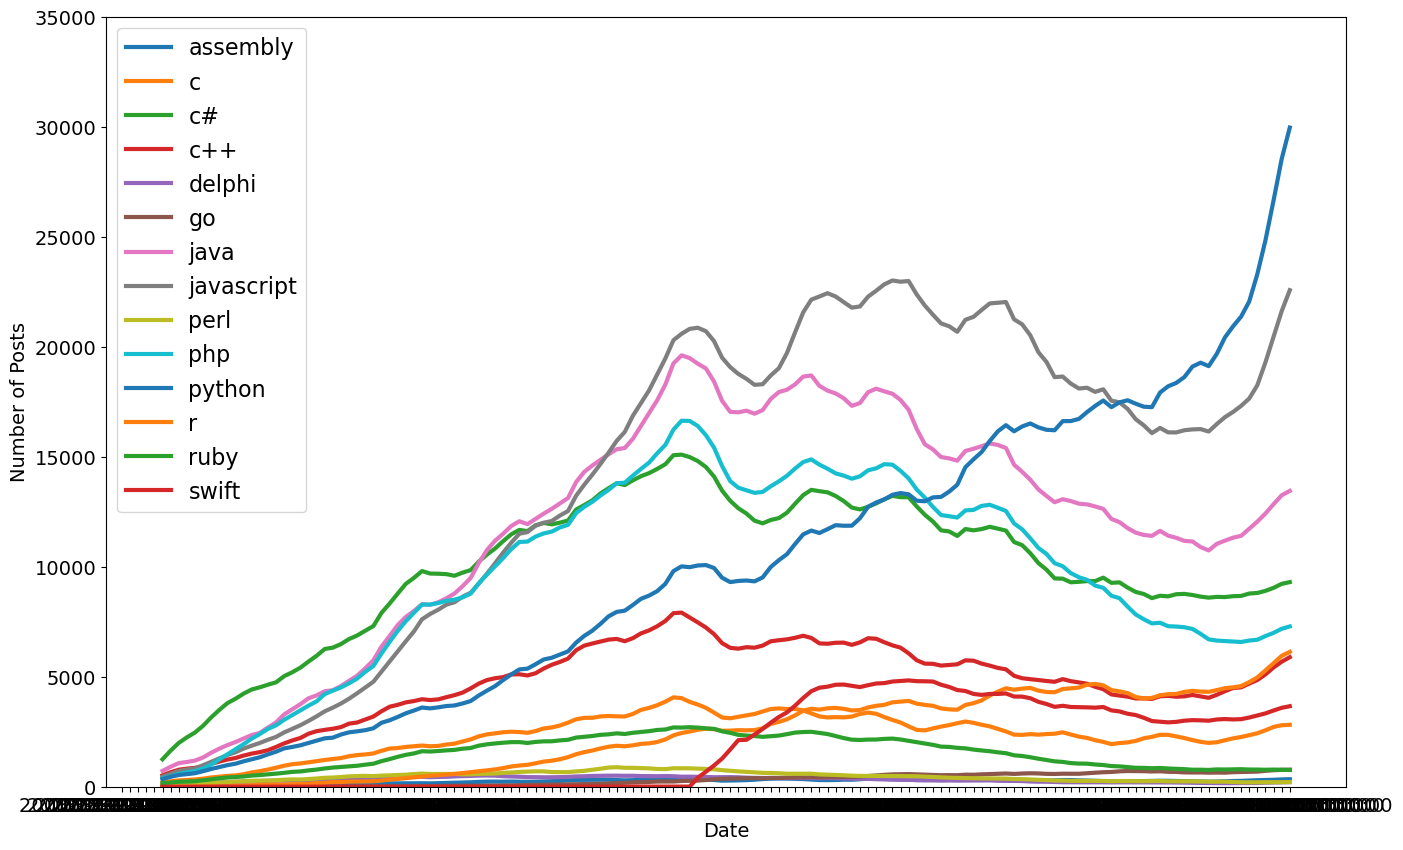

In [171]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(x, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

In [173]:
len(reshaped_df)

145

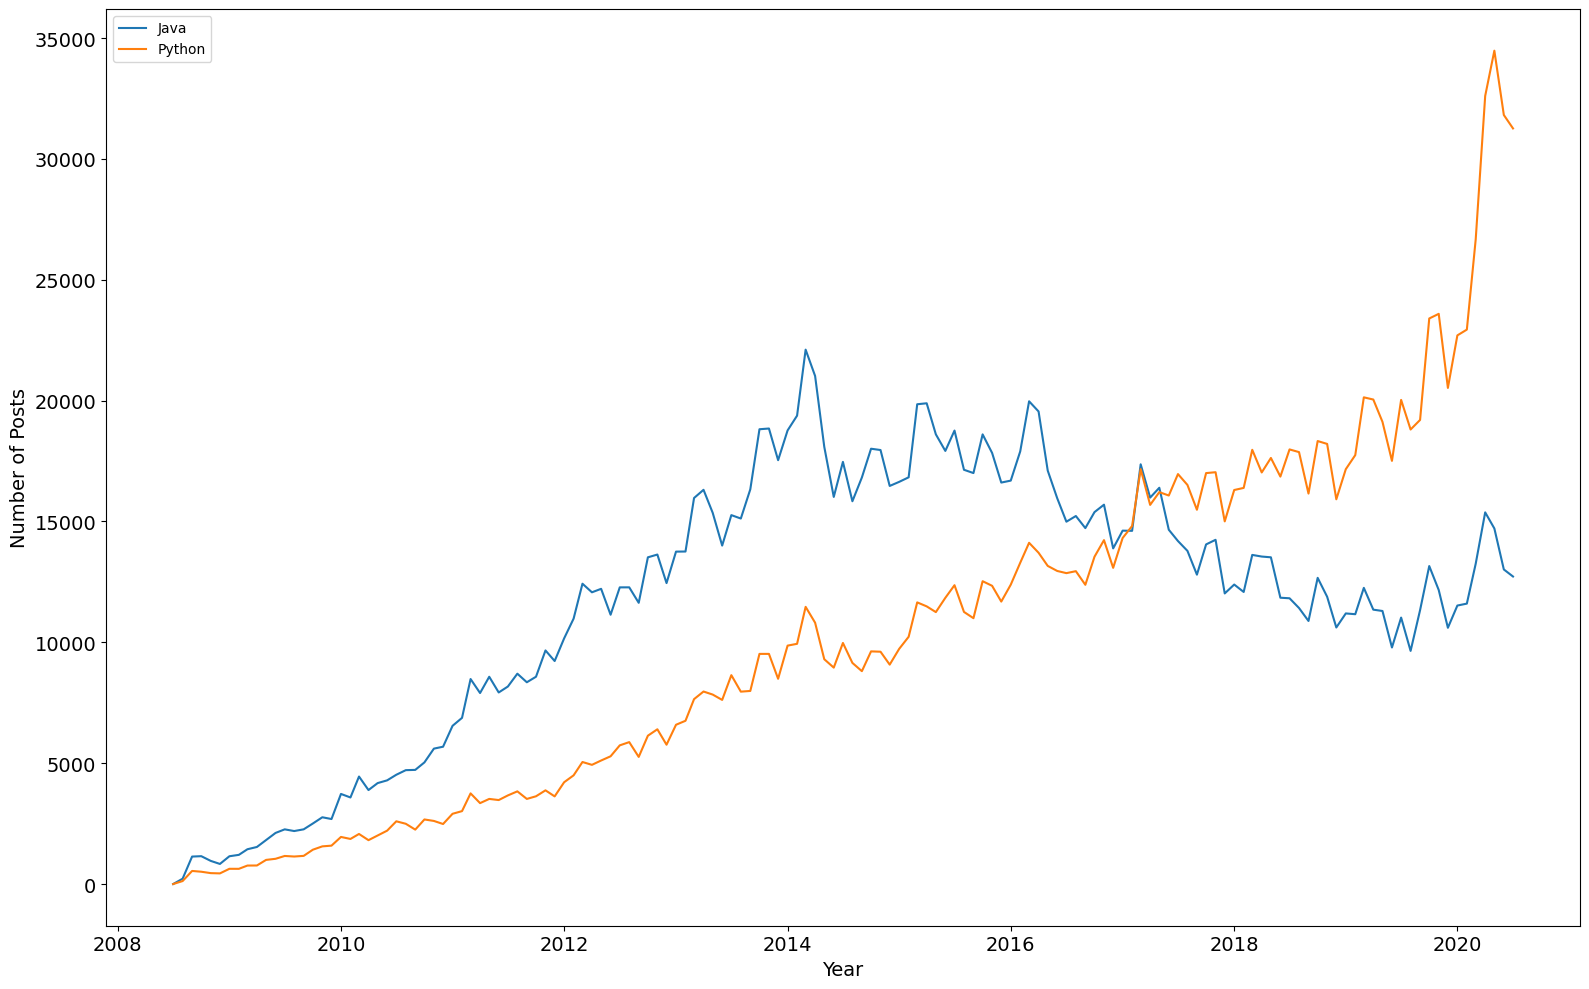

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure your index is datetime
reshaped_df.index = pd.to_datetime(reshaped_df.index)

plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df["java"], label="Java")
plt.plot(reshaped_df.index, reshaped_df["python"], label="Python")

# Set major ticks every 2 years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(2))      # gap every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # show only the year

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()